In [1]:
from FFTUtility import *

In [2]:
# Just Read Data, not plot data
dat1 = Loaddata('data/spec_IR.txt')
data1 = Interplatedata(dat1)
t1,E1  = FFT2TimeDomain(data1)
dat2 = Loaddata('data/spec_UV.txt',)
data2 = Interplatedata(dat2)
t2,E2  = FFT2TimeDomain(data2)

Not Plot DATA.
Not Plot DATA.
Not Plot DATA.
Not Plot DATA.


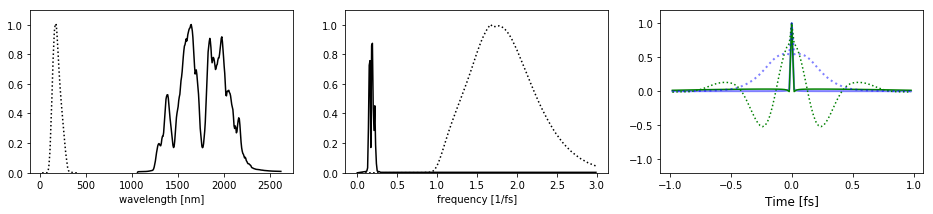

In [3]:
%matplotlib inline
plt.figure(figsize=(16,3))
#PlotPulse2(t1,E1,E2,3)
plt.subplot(1,3,1)
plt.plot(dat1[:,0],dat1[:,1],"k")
plt.plot(dat2[:,0],dat2[:,1],"k:")
plt.ylim([0,1.1])
plt.xlabel("wavelength [nm]")

plt.subplot(1,3,2)
cut = data1[:,0]<3
plt.plot(data1[:,0][cut],data1[:,1][cut],"k")
plt.plot(data2[:,0][cut],data2[:,1][cut],"k:")
plt.ylim([0,1.1])
plt.xlabel("frequency [1/fs]")

plt.subplot(1,3,3)
PlotPulse2(t1,E1,E2,1)
plt.savefig("plot/UV_IR.png",dpi=300)
#PlotSignalFile("data/final.dat",cut=[0,100,20,180])

# 1. Signal Reconstruction

In [22]:
# Define global timeline
time = np.arange(-50,50.0001,0.02)

# Provide infomation about IR and UV
#------------------------------------------
# Define IR
ir_amp   = 10*np.absolute(E1) 
ir_phase = np.angle(E1)
ir_para  = [ir_amp,ir_phase]
# Define UV
#uv_amp   = 4.21*np.absolute(E2) 
uv_amp   = 1*np.absolute(E2)
uv_phase = np.angle(E2)
uv_para  = [uv_amp,uv_phase]
#------------------------------------------

# reconstruct signal from IR and UV
momentum,delay,ip = np.arange(1,7,0.1),8,5
signal = Signal_Reco(momentum,delay,ip,time,ir_para,uv_para)

# this takes 2 minutes
#signal = np.array([[Signal_Reco(p,tau,time,ir_para,uv_para) for tau in np.arange(-8,8,.5)] for p in np.arange(2,10,0.1)])
#np.savetxt("data/RecoSignal.csv",signal,delimiter=",")
#signal = np.genfromtxt("data/RecoSignal.csv",delimiter=",")

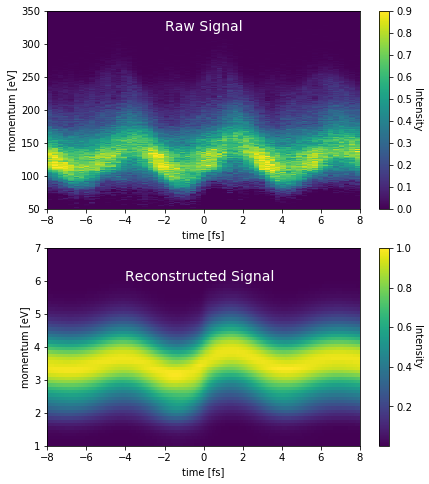

In [23]:
plt.figure(figsize=(7,8))

plt.subplot(2,1,1)
plt.imshow(np.genfromtxt("data/signal.csv",delimiter=","),aspect='auto',cmap="viridis",origin='low',extent=[-8,8,50,350],vmax=0.9)
plt.colorbar().set_label("Intensity",labelpad=10, y=0.5, rotation=270)
plt.xlabel("time [fs]")
plt.ylabel("momentum [eV]")
plt.text(-2,320,"Raw Signal",color="w",fontsize="14")


plt.subplot(2,1,2)
plt.imshow(signal/signal.max(), extent=[-8,8,1,7],aspect="auto",origin='low',vmax=1,cmap="viridis")
plt.colorbar().set_label("Intensity",labelpad=10, y=0.5, rotation=270)
plt.xlabel("time [fs]")
plt.ylabel("momentum [eV]")
plt.text(-4,6,"Reconstructed Signal",color="w",fontsize="14")

plt.savefig("plot/signal.png",dpi=300)

# Appendix Debug area

(-10, 10)

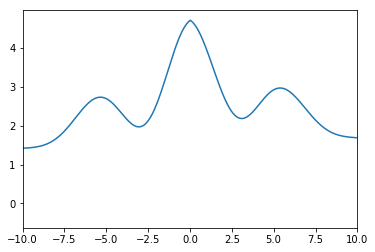

In [10]:
#plt.plot(time,IR_RecoE(time,ir_para))
#plt.plot(time,IR_RecoA(time,ir_para))
p,ip = 3.5,5
signal_phase = - IR_RecoPHI(p,time,ir_para) #+(0.5*p**2+ip)*time
plt.plot(time,signal_phase)
#plt.plot(time,UV_RecoE(time,uv_para))
plt.xlim(-10,10)

(-1.5, 4.5)

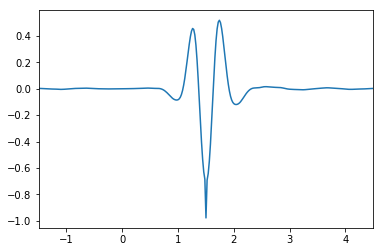

In [11]:
    tau = 1.5
    dt = 0.02
    signal_amp   = UV_RecoE(time,uv_para)
    if tau >=0:
        shiftright = abs(int(tau/dt))
        signal_ampshift = np.concatenate([np.zeros(shiftright),signal_amp]
                                        )[:signal_amp.size]
    else:
        shiftleft  = abs(int(tau/dt))
        signal_ampshift = np.concatenate([signal_amp,np.zeros(shiftleft)]
                                        )[-signal_amp.size:]
    plt.plot(time,signal_ampshift*np.cos(signal_phase))
    plt.xlim(tau-3,tau+3)

In [7]:
%qtconsole